# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1
%cd  manning/Chapter_3_Linear_Regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 68 (delta 18), reused 65 (delta 15), pack-reused 0
Unpacking objects: 100% (68/68), done.
/content/manning/Chapter_3_Linear_Regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


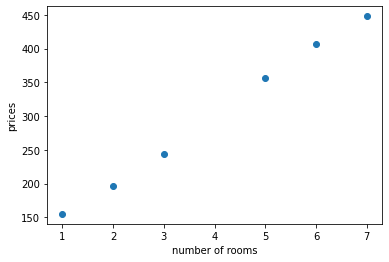

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [5]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate * num_rooms * (price-predicted_price)
    base_price += learning_rate * (price-predicted_price)
    return price_per_room, base_price

In [7]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate * num_rooms 
        base_price += learning_rate 
    else:
        price_per_room -= learning_rate * num_rooms 
        base_price -= learning_rate 
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

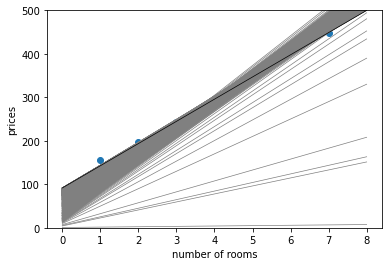

In [8]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate) #use absolute_trick
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate) #use square_trick
        
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

In [9]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    error = np.sqrt(1.0/n * (np.dot(differences, differences))) #use dot product for square
    return error

### Plotting the error function

Price per room: 50.65781332767556
Base price: 99.79504258184782


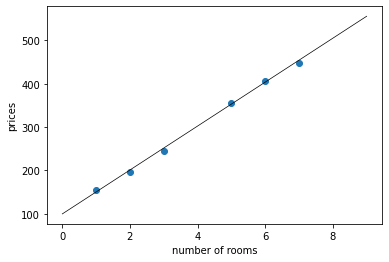

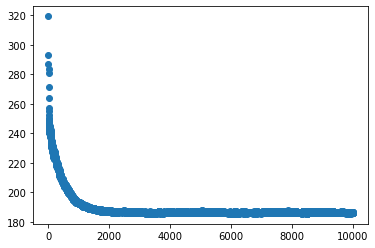

(50.65781332767556, 99.79504258184782)

In [10]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features.reshape(-1, 1), labels)
reg.score(features.reshape(-1, 1), labels)

0.9979437166148433

In [12]:
print("weights:",reg.coef_)
print("intercept:",reg.intercept_)

weights: [50.39285714]
intercept: 99.59523809523819
